# Task 1 

### 1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.

Aesthetics Used:<br> 
x: Income <br>
y: Life Expectancy<br> 
fill: Colored by Continent<br> 
size: Population<br>

Variables mapped (q1Data)<br>
Individual Income = "income"<br>
Life Expectancy = "life_exp"<br>
Colored by Continent = "four_regions"<br>
Population = "population"

### 2. Import the q1data.csv dataset.



In [1]:
import pandas as pd 

data1 = pd.read_csv("/Users\owenk\OneDrive\Documents\GitHub\GSB_544_ML\Lab 1\Data\q1data.csv")

data1 = data1[data1["year"] == 2010] #filter data 1 for 2010 values
data1 = data1.dropna() #filter out na values from data
print(data1.head)

<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:3: SyntaxWarning: invalid escape sequence '\o'
C:\Users\owenk\AppData\Local\Temp\ipykernel_26636\180086376.py:3: SyntaxWarning: invalid escape sequence '\o'
  data1 = pd.read_csv("/Users\owenk\OneDrive\Documents\GitHub\GSB_544_ML\Lab 1\Data\q1data.csv")


<bound method NDFrame.head of       income  life_exp  population  year      country four_regions  \
0     1910.0      61.0  29200000.0  2010  Afghanistan         asia   
1    11100.0      78.1   2950000.0  2010      Albania       europe   
2    11100.0      74.7  36000000.0  2010      Algeria       africa   
3    46900.0      81.9     84500.0  2010      Andorra       europe   
4     7680.0      60.8  23400000.0  2010       Angola       africa   
..       ...       ...         ...   ...          ...          ...   
192  20400.0      75.4  28400000.0  2010    Venezuela     americas   
193   5350.0      73.3  88000000.0  2010      Vietnam         asia   
194   4700.0      67.8  23200000.0  2010        Yemen         asia   
195   3200.0      57.5  13600000.0  2010       Zambia       africa   
196   2560.0      54.4  12700000.0  2010     Zimbabwe       africa   

                  six_regions       eight_regions           world_bank_region  
0                  south_asia           asia_west

### 3. Recreate the plot as best you can using plotnine.

c:\Users\owenk\anaconda3\Lib\site-packages\plotnine\scales\scale_continuous.py:221: RuntimeWarning: divide by zero encountered in log10
C:\Users\owenk\AppData\Local\Temp\ipykernel_26636\772710163.py:33: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


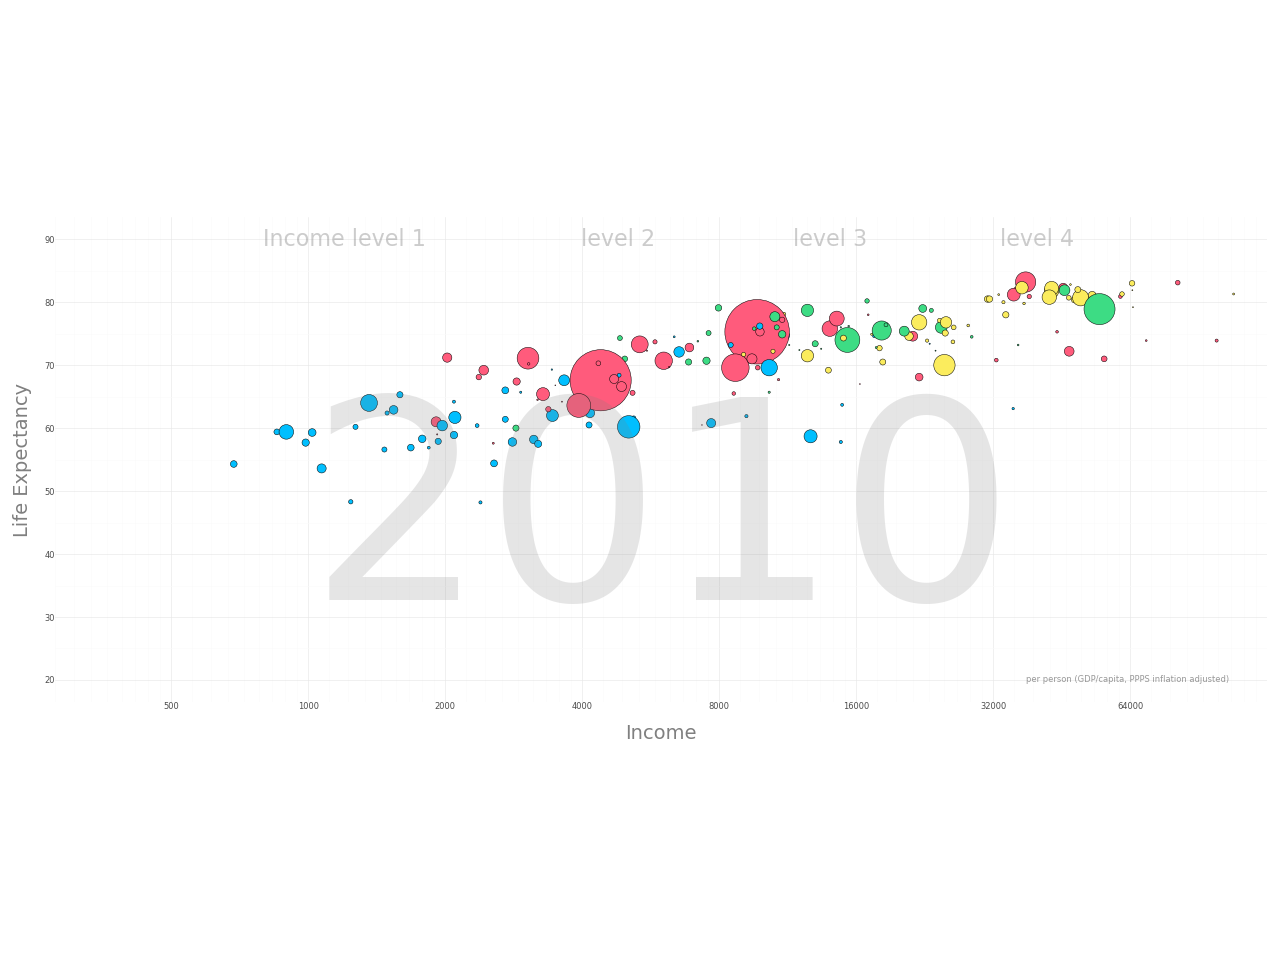

In [3]:
from plotnine import annotate, element_text, element_line, ggplot, aes, geom_point, scale_size, labs, theme_minimal, scale_fill_manual, scale_y_continuous, scale_x_log10, theme
import matplotlib.pyplot as plt 
import numpy as np

ybreaks = np.arange(0,91,10) #create increments for x and y axes
xbreaks = [500, 1000, 2000, 4000, 8000, 16000, 32000, 64000] 

bubble_plot1 = (ggplot(data1, aes(x='income', y='life_exp', size='population', fill = 'four_regions')) 
        + geom_point(alpha=1.0, stroke = .1) 
        + scale_y_continuous(breaks = list(ybreaks), limits = [20,90])
        + scale_x_log10(breaks = list(xbreaks), limits = [0,128000]) #referenced to Stack Overflow, scale the xbreaks from above with equally sized increments 
        + scale_size(range=(.05, 13))  # Bubble size
        + scale_fill_manual(values={'africa': '#00BFFF', 'europe': '#FBEC5D', 'asia': '#ff5b7c', 'americas': '#3DDC84'}) 
        + labs(x= 'Income', y= 'Life Expectancy') 
        + annotate('text', x=6000, y=45, label='2010', size=100, color='gray', alpha=0.2) #2010 in background
        + annotate('text', x=1200, y=90, label='Income level 1', size=8, color='gray', alpha=0.4) #Level 1 
        + annotate('text', x=4800, y=90, label='level 2', size=8, color='gray', alpha=0.4) #level 2
        + annotate('text', x=14000, y=90, label='level 3', size=8, color='gray', alpha=0.4) #level 3
        + annotate('text', x=40000, y=90, label='level 4', size=8, color='gray', alpha=0.4) #level 4
        + annotate('text', x=63000, y=20, label='per person (GDP/capita, PPPS inflation adjusted)', size = 3, alpha = .4)
        + theme_minimal() #most representative of original plot 
        + theme(
                aspect_ratio=.4, #stretches the plot to rectangular, aspect_ratio theme learned from Gemini
                axis_title_x=element_text(size=7, color='Gray'),
                axis_title_y=element_text(size=7, color='Gray'),
                axis_text=element_text(size=3),
                panel_grid_major=element_line(size=0.2),
                panel_grid_minor=element_line(size=0.2),
                legend_position = ('none')
                )

       )
print(bubble_plot1)

### 4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it's good or bad for visualizing these data. 

C:\Users\owenk\AppData\Local\Temp\ipykernel_26636\3352163581.py:7: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


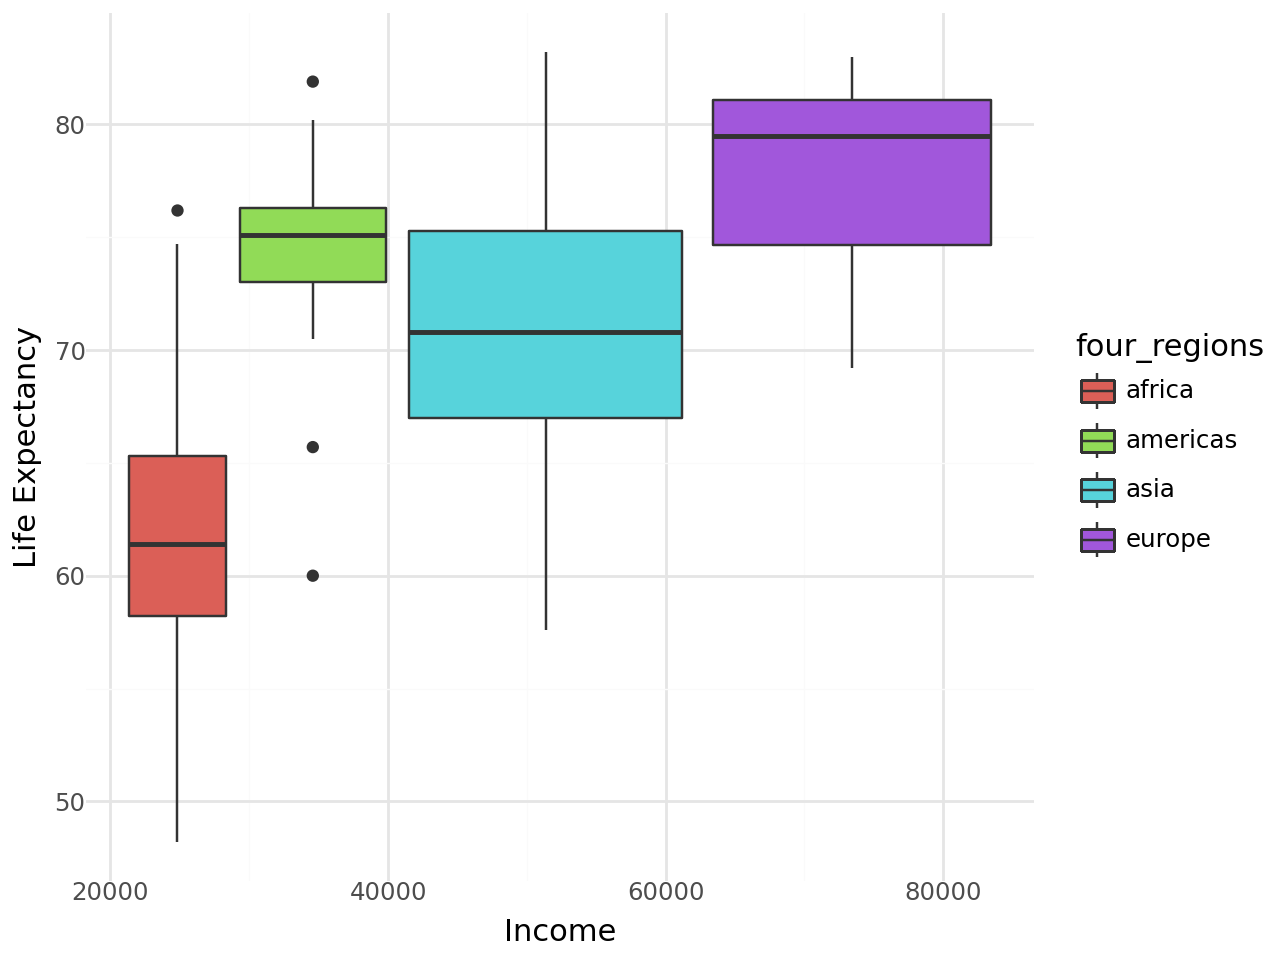

In [5]:
from plotnine import geom_boxplot
alt_plot1 = (ggplot(data1, aes(x='income', y='life_exp', size = 'population', fill='four_regions'))
        + geom_boxplot() 
        + labs(x='Income', y='Life Expectancy')
        + theme_minimal()
)
print(alt_plot1)

The alternative plot is a boxplot using the same data from q1. It shows the mean life expectancy for each income group, based on region. However this plot is not effective at representing income vs life expectancy by region for a few reasons. The first reason is that income here is represented by continuous variables, so a box plot will not represent the whole income of recorded values in the data. This also makes the boxes different sizes, based on average distribution of income by region. The second reason why this may be a poor way to represent the data is that population by region is not accurately represented. Unlike the first graph, a boxplot can not represent the population of countries as sizes because the size of the boxes is already represented by income approximate range. The bubble plot is flawed in some ways, but it shows more dimensions than a single boxplot can.\
The boxplot however, shows other information with more clarity than the bubble plot. From the alternative plot, we can see than Europe, as a whole region, has the highest income and average life expectancy than the other regions.     

# Task 2

### 1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.

Aesthetics Used: <br>
x - Exports as a % of GDP <br>
y - Imports as a % of GDP<br> 
fill - Colored by Continent<br>
size - energy<br> 


Variables Mapped:<br>
x - exports<br>
y - imports<br> 
fill - four_regions<br>
size - energy


### 2. Import the q2data.csv dataset

In [6]:
data2 = pd.read_csv("/Users\owenk\OneDrive\Documents\GitHub\GSB_544_ML\Lab 1\Data\q2data.csv")
data2 = data2[data2["year"] == 1997] 

data2 = data2.dropna() #take out NAs from data

def convert_energy(value): #convert energy ks to float, solution from assistance with classmate, referenced from ChatGPT
        if 'k' in value: #k as representing thousand
                return float(value.replace('k', '').strip()) * 1000 #use strip method to replace k, and multiply by 1000.
        else: 
                return float(value) 
data2['energy'] = data2['energy'].apply(convert_energy) #apply the changes from above

data2['four_regions'] = data2['four_regions'].astype(str)
print(data2.head)

<bound method NDFrame.head of      imports  exports  energy  year     country four_regions  \
1       36.7     11.5   427.0  1997     Albania       europe   
2       22.5     22.6   825.0  1997     Algeria       africa   
6       12.9     10.4  1660.0  1997   Argentina     americas   
7       52.8     19.0   610.0  1997     Armenia       europe   
9       20.5     19.6  5550.0  1997   Australia         asia   
..       ...      ...     ...   ...         ...          ...   
198     22.9     22.6  2080.0  1997  Uzbekistan         asia   
200     22.7     20.9  2250.0  1997   Venezuela     americas   
201     52.2     44.8   340.0  1997     Vietnam         asia   
204     31.6     24.6   617.0  1997      Zambia       africa   
205     45.1     43.4   845.0  1997    Zimbabwe       africa   

                  six_regions       eight_regions           world_bank_region  
1         europe_central_asia         europe_east       Europe & Central Asia  
2    middle_east_north_africa        afri

<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
C:\Users\owenk\AppData\Local\Temp\ipykernel_26636\3281194209.py:1: SyntaxWarning: invalid escape sequence '\o'


### 3. Recreate the plot as best as you can using plotnine.

C:\Users\owenk\AppData\Local\Temp\ipykernel_26636\3662774732.py:26: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


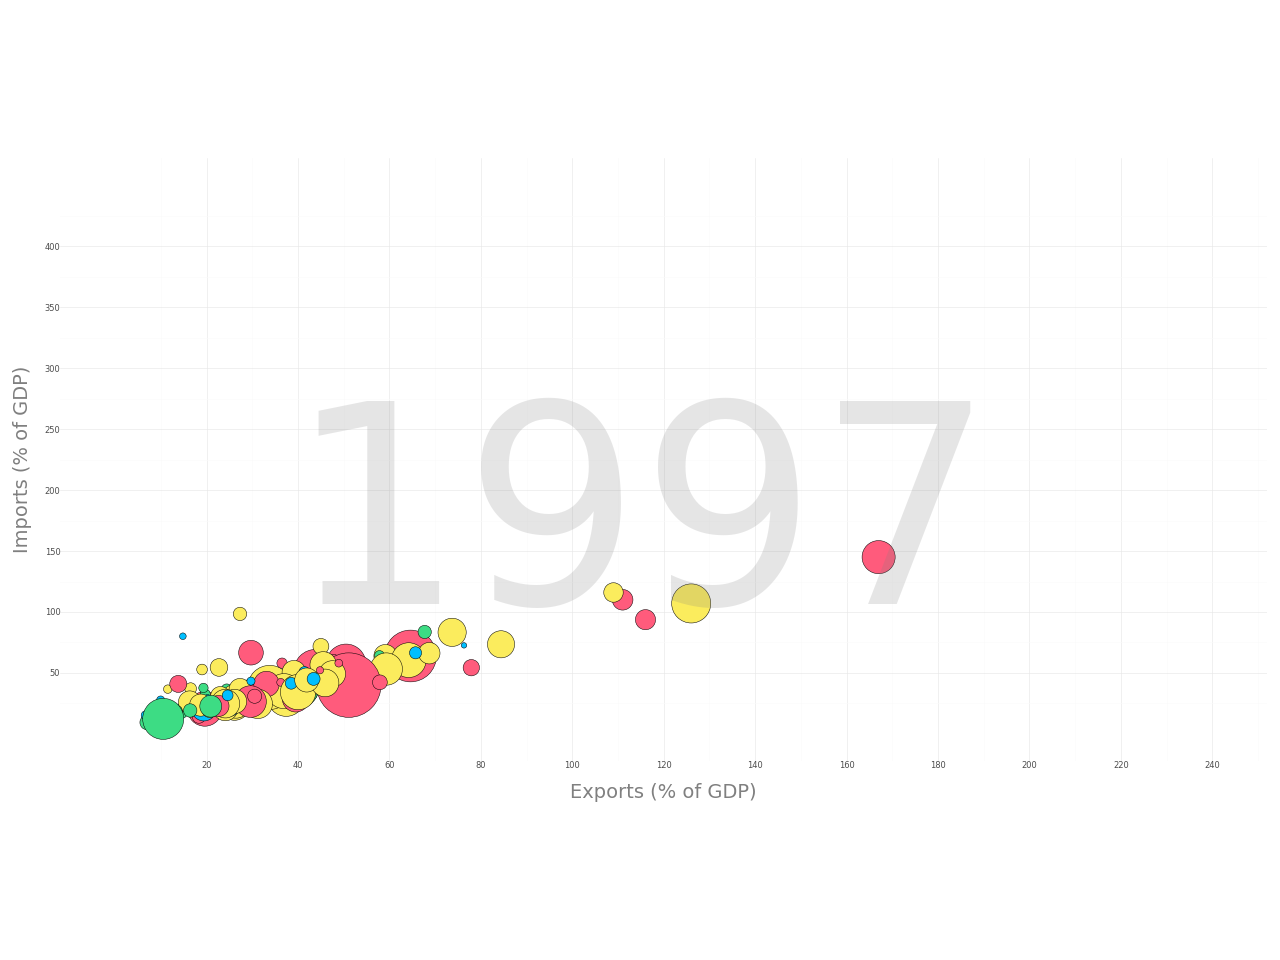

In [7]:
from plotnine import scale_y_continuous, scale_x_continuous

ybreaks = [50, 100, 150, 200, 250, 300, 350, 400]
xbreaks = [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240]

bubble_plot2 = (ggplot(data2, aes(x='exports', y='imports', size='energy', fill = 'four_regions')) 
        + geom_point(alpha=1.0, stroke = .1) 
        + scale_y_continuous(breaks = list(ybreaks), limits = [0,450])
        + scale_x_continuous(breaks = list(xbreaks), limits = [0,240])
        + scale_size(range=(.05, 13))  # Bubble size
        + scale_fill_manual(values={'africa': '#00BFFF', 'europe': '#FBEC5D', 'asia': '#ff5b7c', 'americas': '#3DDC84'}) 
        + labs(x= 'Exports (% of GDP)', y= 'Imports (% of GDP)')
        + annotate('text', x=115, y=170, label='1997', size=100, color='gray', alpha=0.2)
        + theme_minimal()
        + theme(
                aspect_ratio=.5,
                axis_title_x=element_text(size=7, color='Gray'),
                axis_title_y=element_text(size=7, color='Gray'),
                axis_text=element_text(size=3),
                panel_grid_major=element_line(size=0.2),
                panel_grid_minor=element_line(size=0.2),
                legend_position = ('none')
                )

       )
print(bubble_plot2)

### 4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it's good or bad for visualizing these data. 

C:\Users\owenk\AppData\Local\Temp\ipykernel_26636\3000566679.py:6: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


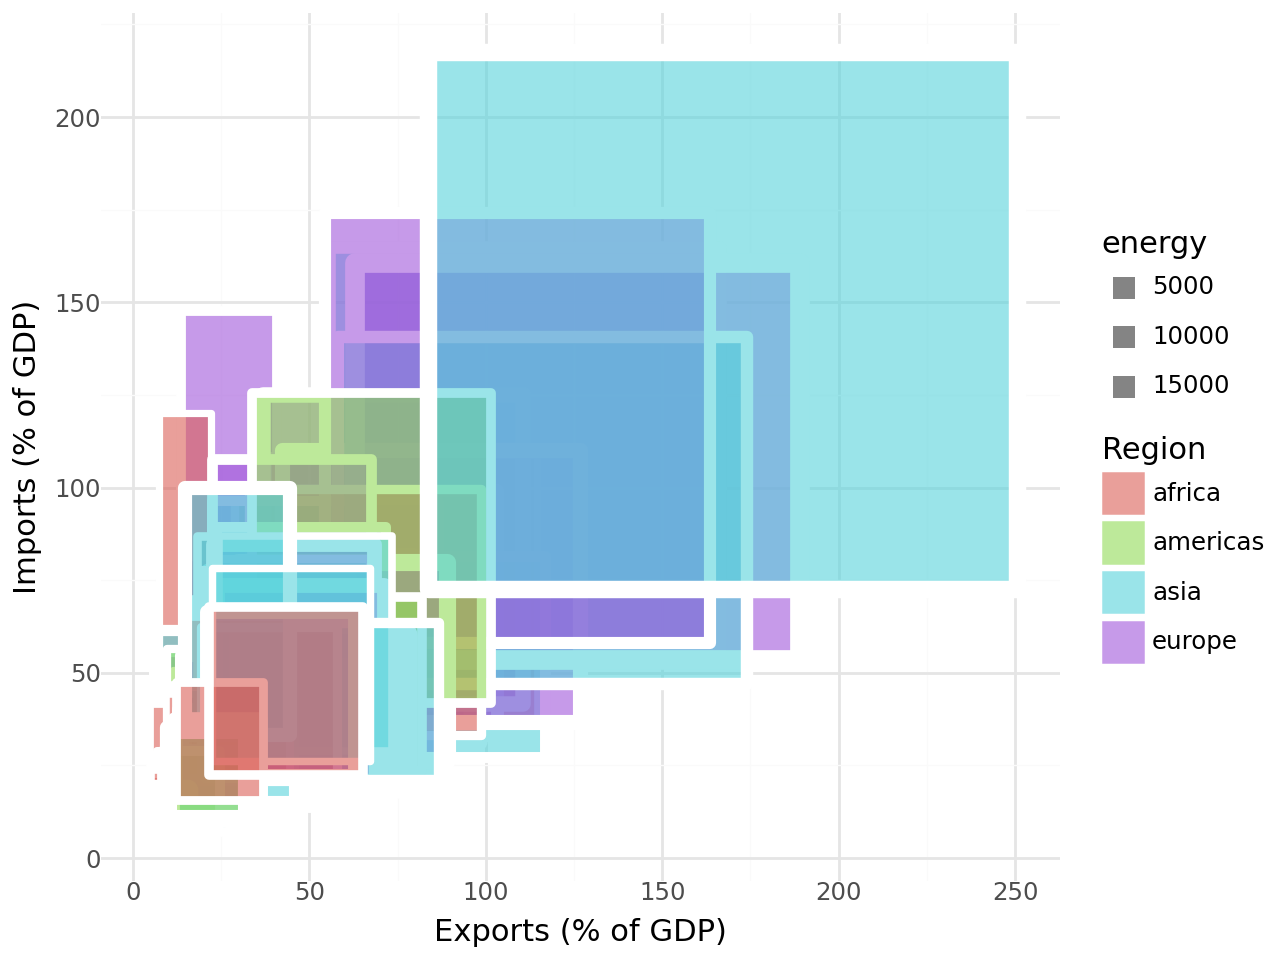

In [8]:
from plotnine import geom_tile
alt_plot2 = (ggplot(data2, aes(x='exports', y='imports', size='energy', fill = 'four_regions')) 
        + geom_tile( aes(width='exports', height='imports'), color='white', alpha=.6) 
             + labs(x='Exports (% of GDP)', y='Imports (% of GDP)', fill='Region')
             + theme_minimal())
print(alt_plot2)

This geom_tile plot shows shows imports and exports as a % of GDP by region, represented by color of tiles, and the size of the tiles is represented by tile size. This kind of plot is able to show how Asia has some of the highest import and export percentages of GDP, while Africa has some of the lowest. Similar to the original plot, this tile plot has a lack of clarity in the lower levels of import/export, due to overlay of of tiles. The size of the tiles could also be misrepresentative of energy values, especially when compared to bubble size of the original plot. 

# Task 3 

### 1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.
x - number of internet users<br> 
y - gdp<br>
size - income<br>
fill - region or continent<br>

### 2. Import the q3data.csv dataset 


In [9]:
data3 = pd.read_csv("/Users\owenk\OneDrive\Documents\GitHub\GSB_544_ML\Lab 1\Data\q3data.csv")
df3 = pd.DataFrame(data3)
data3 = data3[data3["year"] == 2001]
data3 = data3.dropna()

print(data3)

     internet_users      gdp   income  year      country four_regions  \
0           0.00456    330.0   1190.0  2001  Afghanistan         asia   
1           0.39000   2570.0   6780.0  2001      Albania       europe   
2           1.59000   3770.0   9230.0  2001      Algeria       africa   
4          11.30000  42600.0  35600.0  2001      Andorra       europe   
5           0.27000   2440.0   2900.0  2001       Angola       africa   
..              ...      ...      ...   ...          ...          ...   
209         4.91000  10800.0  14800.0  2001    Venezuela     americas   
210         1.85000    847.0   3270.0  2001      Vietnam         asia   
212         0.51900   1190.0   4940.0  2001        Yemen         asia   
213         0.47800    991.0   2080.0  2001       Zambia       africa   
214         1.10000   1330.0   3190.0  2001     Zimbabwe       africa   

                  six_regions       eight_regions           world_bank_region  
0                  south_asia           asi

<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
C:\Users\owenk\AppData\Local\Temp\ipykernel_26636\1768090630.py:1: SyntaxWarning: invalid escape sequence '\o'


## 3. Recreate the plot as best you can using plotnine. 


<>:14: SyntaxWarning: invalid escape sequence '\%'
<>:14: SyntaxWarning: invalid escape sequence '\%'
C:\Users\owenk\AppData\Local\Temp\ipykernel_26636\2203116212.py:14: SyntaxWarning: invalid escape sequence '\%'
c:\Users\owenk\anaconda3\Lib\site-packages\plotnine\scales\scale_continuous.py:221: RuntimeWarning: divide by zero encountered in log10
C:\Users\owenk\AppData\Local\Temp\ipykernel_26636\2203116212.py:27: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


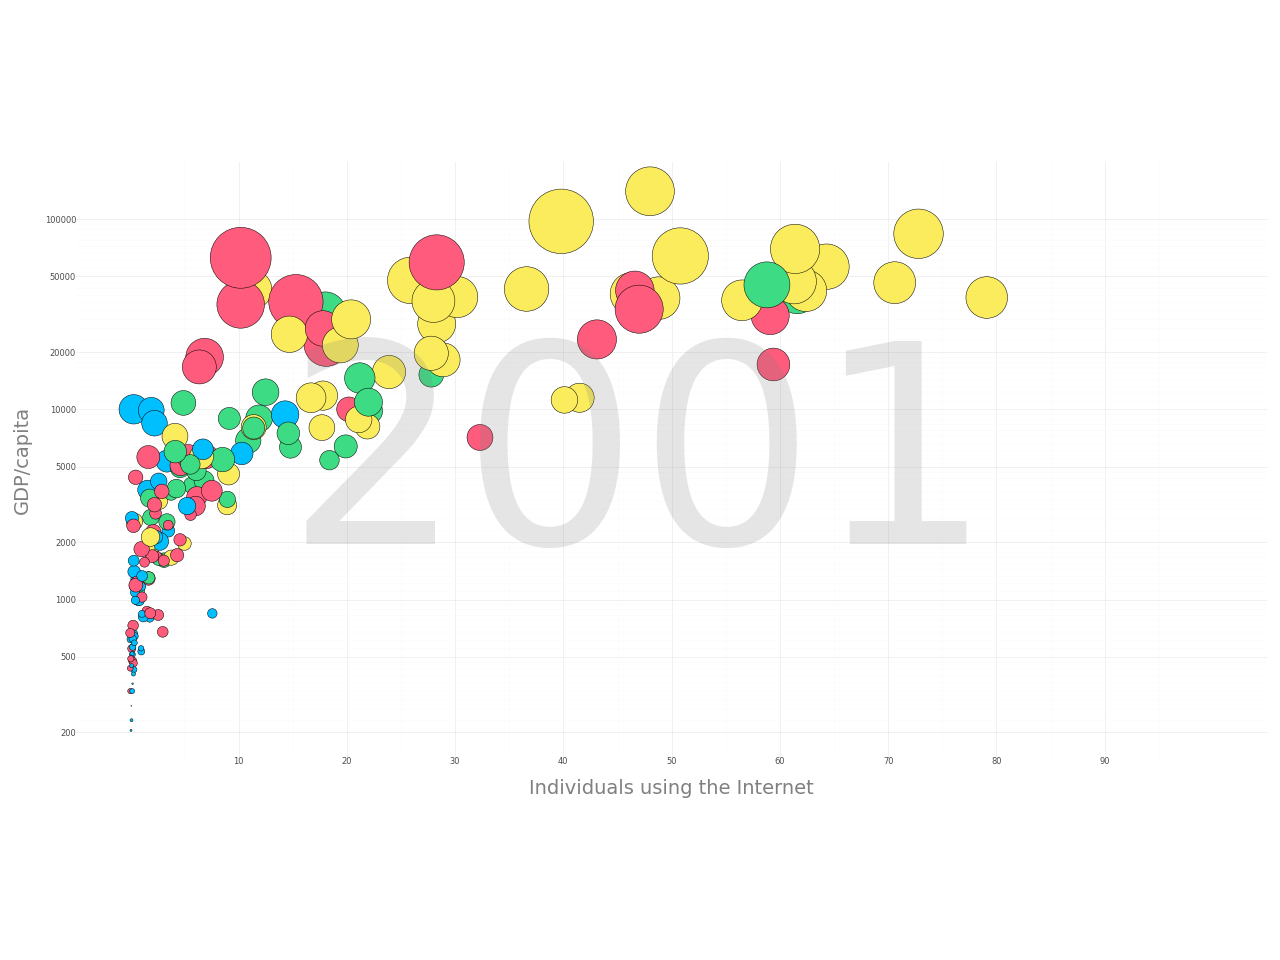

In [12]:
from plotnine import scale_size_continuous, scale_y_log10

ybreaks3 = [200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
xbreaks3 = [10, 20, 30, 40, 50, 60, 70, 80, 90]

bubble_plot3 = (ggplot(data3, aes(x='internet_users', y='gdp', size='income', fill = 'four_regions')) 
        + geom_point(alpha=1.0, stroke = .1) 
        + scale_y_log10(breaks = list(ybreaks3), limits = [0,200000])
        + scale_x_continuous(breaks = list(xbreaks3), limits = [0,100])
        + scale_size(range=(.05, 13))  # Bubble size
        + scale_fill_manual(values={'africa': '#00BFFF', 'europe': '#FBEC5D', 'asia': '#ff5b7c', 'americas': '#3DDC84'}) 
        + labs(x= 'Individuals using the Internet', y= 'GDP/capita')
        + annotate('text', x=47, y=5000, label='2001', size=100, color='gray', alpha=0.2)
        + annotate('text', x = 95, y=1, label='\% of population', size = 1, color='gray', alpha=.2)
        + theme_minimal()
        + theme(
                aspect_ratio=.5,
                axis_title_x=element_text(size=7, color='Gray'),
                axis_title_y=element_text(size=7, color='Gray'),
                axis_text=element_text(size=3),
                panel_grid_major=element_line(size=0.2),
                panel_grid_minor=element_line(size=0.2),
                legend_position = ('none')
                )

       )
print(bubble_plot3)

### 4. What other geometries could you use here besides geom_point?? Provide an actual plot of another geometry being used here and why its good for visulaizing these data. 

C:\Users\owenk\AppData\Local\Temp\ipykernel_26636\646248977.py:8: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


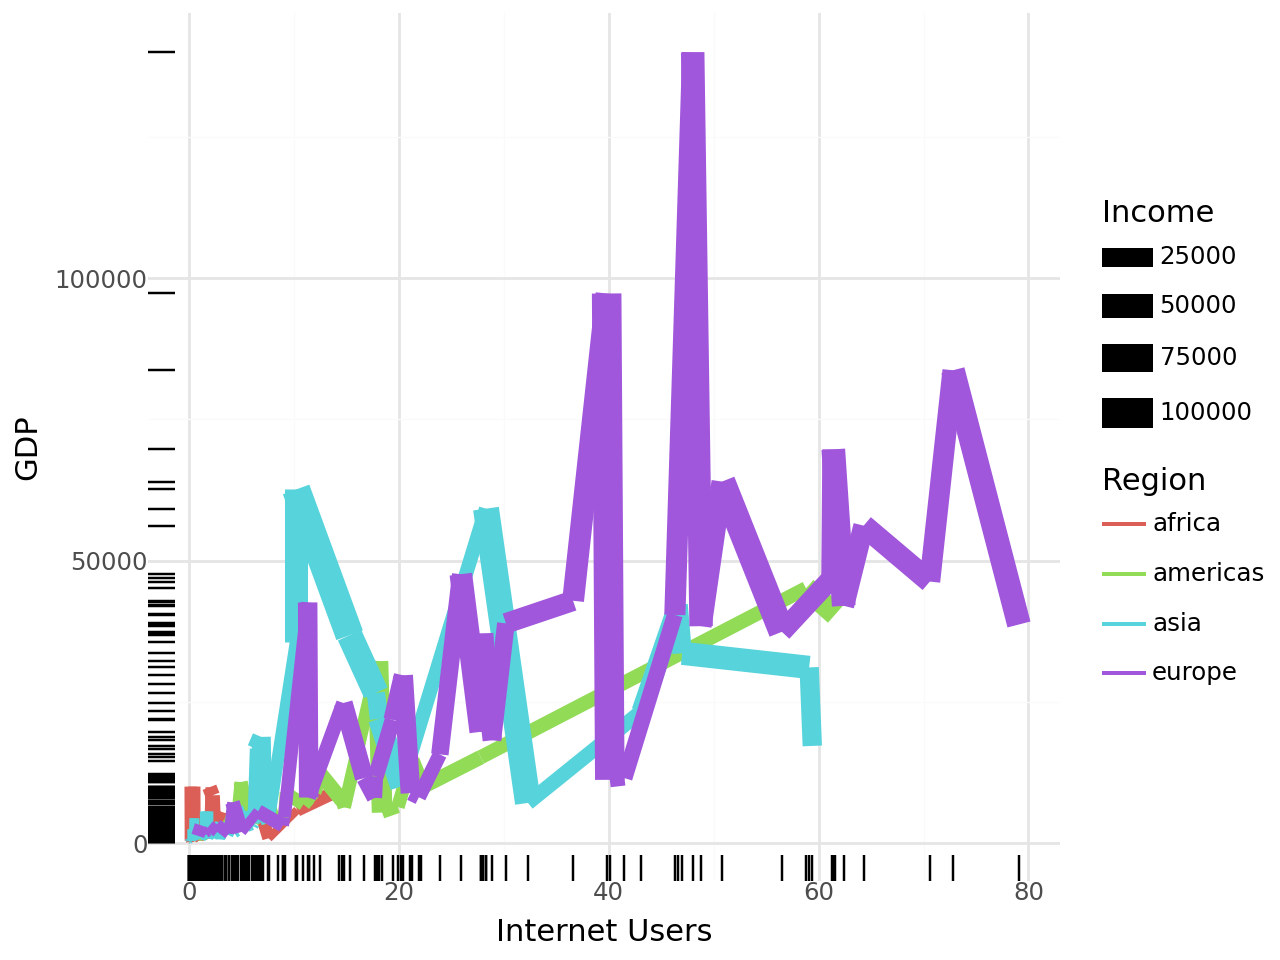

In [14]:
from plotnine import geom_rug, geom_line
alt_plot3 = (ggplot(data3, aes(x='internet_users', y='gdp')) 
            + geom_line(aes(size='income', color='four_regions'), alpha=1.0) 
            + geom_rug(sides="b") 
            + geom_rug(sides="l") 
            + labs(x='Internet Users', y='GDP', color='Region', size='Income')
            + theme_minimal())
print(alt_plot3)

This plot is a "misleading" line plot with rug values on each axis. The lines do not represent ordinal data, due to the time frame being 2001, hence why the plot is misleading. However, the rug aspect of this plot is helpful to indicate to users where values are plotted, and the frequency of values at different areas on the axes. It also shows Europe as having a substantially higher GDP in relation to Internet Users, which may not be the case, as indicated by the rug marks. The frquency of values at higher levels on the graph is minute, but primarily European. With the bubble plots from gapminder, a modified rug aspect might helpful to discern what bubbles may be overlaying other bubbles. Overall, this plot is a poor way to represent the data set from q3, compared to the original bbubble plot. 